**Integrantes: Francisca Urrutia, Belen Bulo y Benjamin Parraguez**

In [ ]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Base de datos
df = pd.read_csv('SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


**Limpiar datos**

In [ ]:
def limpiar_datos(df):
    # Creamos una copia para no modificar los datos originales
    df_clean = df.copy()

    # 1. Manejo de valores faltantes
    df_clean = df_clean.fillna({
    'track_name': 'Unknown Track'
    })

    # 2. Manejo de outliers
    df_clean = df_clean[~((df_clean['genre'] == 'Comedy') & (df_clean['duration_ms'] >= 600000))]

    return df_clean

# Aplicamos la limpieza
df_limpio = limpiar_datos(df)

In [ ]:
from google.colab import files

#Guardar archivo
df_limpio.to_excel('base_datos_limpia.xlsx', index=False)

#Descargar archivo
files.download('base_datos_limpia.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Cargamos la base de datos limpia
df_limpia = pd.read_excel('base_datos_limpia.xlsx', engine='openpyxl')
df_limpia.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
# Para la matriz correlacion vamos a considerar solo las variables numéricas
# Creamos una nueva base ignorando las variables tipo object
object_columns = df_limpia.select_dtypes(include=['object']).columns

df_numeric = df_limpia.drop(columns=object_columns)
df_numeric.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


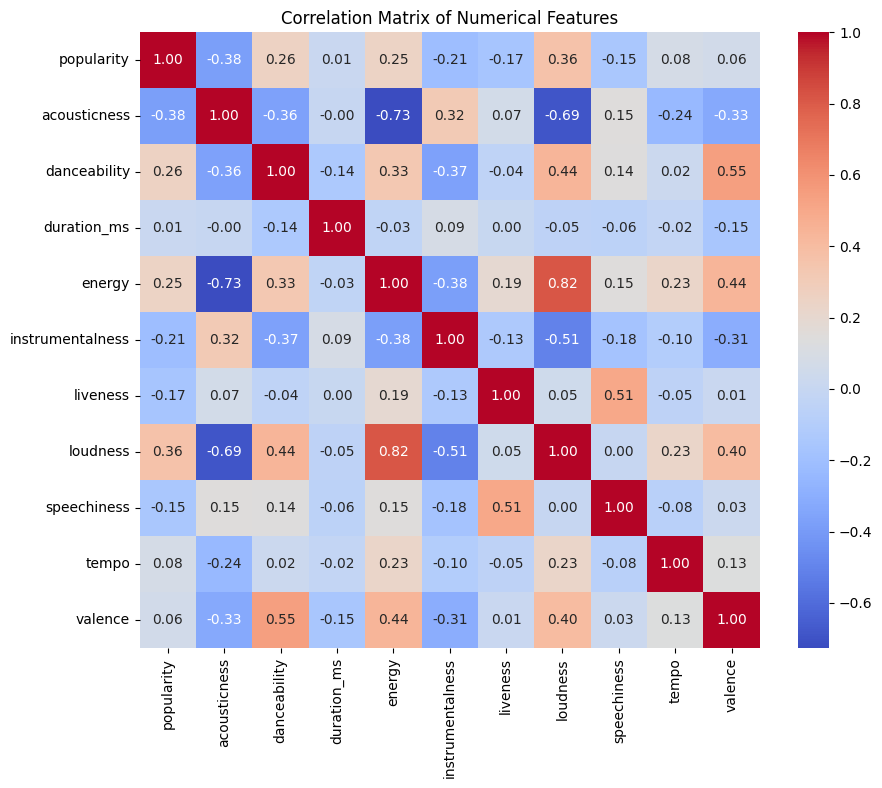

In [ ]:
# matriz correlacion
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Segmentación según características de las canciones**

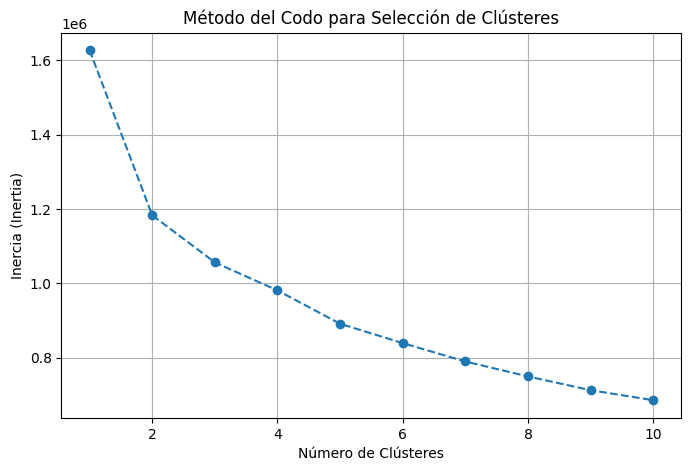

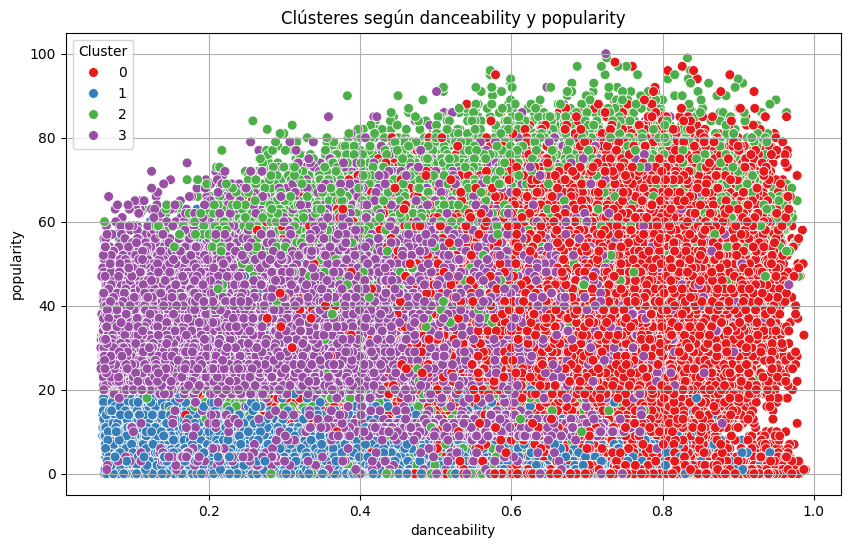

         popularity  danceability    energy   valence       tempo  \
Cluster                                                             
0         40.678391      0.688867  0.688013  0.724867  116.855160   
1         23.007989      0.389975  0.213089  0.267973  106.411235   
2         50.732790      0.565630  0.701782  0.404406  128.260902   
3         37.493462      0.441226  0.403131  0.258613  106.799099   

         acousticness  genre_numeric  
Cluster                               
0            0.225301      17.015066  
1            0.860530       9.737033  
2            0.138889      10.301140  
3            0.668392      23.473023  
Cluster  Cluster  genre           
0        0        Reggaeton           0.113399
                  Reggae              0.108883
                  Ska                 0.098461
                  Soul                0.064310
                  Jazz                0.062834
1        1        Opera               0.236148
                  Classical       

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Asignar valores numéricos a los géneros
genre_mapping = {genre: idx for idx, genre in enumerate(df_limpia['genre'].unique(), start=1)}
df_limpia['genre_numeric'] = df_limpia['genre'].map(genre_mapping)

# Seleccionar las variables relevantes (ahora incluye genre_numeric)
features = ['popularity', 'danceability', 'energy', 'valence', 'tempo', 'acousticness', 'genre_numeric']
X = df_limpia[features]

# Escalar las variables para normalizar sus rangos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Escalar las variables para normalizar sus rangos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar el número óptimo de clústeres usando el método del codo
inertia = []
range_n_clusters = range(1, 11)  # Probar entre 1 y 10 clústeres

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia (Inertia)')
plt.title('Método del Codo para Selección de Clústeres')
plt.grid()
plt.show()

# Elegir el número óptimo de clústeres
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_limpia['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar los clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_limpia, x='danceability', y='popularity', hue='Cluster', palette='Set1', s=50)
plt.title('Clústeres según danceability y popularity')
plt.xlabel('danceability')
plt.ylabel('popularity')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Análisis de los clústeres
cluster_summary = df_limpia.groupby('Cluster')[features].mean()
print(cluster_summary)

# Distribución de género por cluster
genre_distribution = (
    df_limpia.groupby('Cluster')['genre']
    .value_counts(normalize=True)
    .groupby(level=0)  # Agrupar por Clúster
    .apply(lambda x: x.nlargest(5))  # Obtener los 5 géneros más altos por clúster
)

# Mostrar los resultados
print(genre_distribution)

**Análisis de sentimientos**

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import os
import cv2
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import nltk
nltk.download('all')
from textblob import TextBlob
from tabulate import tabulate

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

In [ ]:
#Base de datos
df_limpia = pd.read_excel('base_datos_limpia.xlsx', engine='openpyxl')
df_limpia.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
#Transformar a minuscula
df_limpia["track_name"]=df_limpia["track_name"].str.lower()

#Tokens
df_limpia["tokens"]=df_limpia["track_name"].apply(word_tokenize)

#Definir stop-words
stop_words=set(stopwords.words('english'))
#Eliminar stop-words
df_limpia["tokens"]=df_limpia["tokens"].apply(lambda x: [word for word in x if word not in stop_words])

#Agregar tag
df_limpia["pos_tags"]=df_limpia["tokens"].apply(pos_tag)

#Lematizar
lemmatizer=WordNetLemmatizer()
df_limpia["lemmatized"]=df_limpia["tokens"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

#Unir las palabras
df_limpia["lemmatized_text"]=df_limpia["lemmatized"].apply(lambda x: " ".join(x))

In [ ]:
#Función para obtener el sentimiento
def sentimiento(texto):
    analisis=TextBlob(texto)
    if analisis.sentiment.polarity > 0:
        return 'Positivo'
    elif analisis.sentiment.polarity < 0:
        return 'Negativo'
    else:
        return 'Neutral'

#Aplicar análisis de sentimiento
df_limpia['sentimiento']=df_limpia['lemmatized_text'].apply(sentimiento)

#Resultados
df_limpia[['track_name', 'sentimiento']].head()

,track_name,sentimiento
0,c'est beau de faire un show,Neutral
1,perdu d'avance (par gad elmaleh),Neutral
2,don't let me be lonely tonight,Negativo
3,dis-moi monsieur gordon cooper,Neutral
4,ouverture,Neutral


In [ ]:
#Agrupar por género y sentimiento, contando el número de canciones
tabla_sentimientos=df_limpia.groupby(['genre', 'sentimiento']).size().unstack(fill_value=0)

#Calcular el total de canciones por género
totales_por_genero=tabla_sentimientos.sum(axis=1)

#Transformar a porcentaje
tabla_porcentajes=(tabla_sentimientos.div(totales_por_genero, axis=0) * 100).round(2)

#Agregar símbolo de porcentaje
tabla_porcentajes=tabla_porcentajes.applymap(lambda x: f"{x:.2f}%")

#Renombrar el índice 'genre' a 'Género'
tabla_porcentajes.index.name="Género"

#Tabla
tabla=tabulate(tabla_porcentajes, headers="keys", tablefmt="fancy_grid", showindex=True)
print(tabla)

╒══════════════════╤════════════╤═══════════╤════════════╕
│ Género           │ Negativo   │ Neutral   │ Positivo   │
╞══════════════════╪════════════╪═══════════╪════════════╡
│ A Capella        │ 3.36%      │ 76.47%    │ 20.17%     │
├──────────────────┼────────────┼───────────┼────────────┤
│ Alternative      │ 8.67%      │ 78.24%    │ 13.10%     │
├──────────────────┼────────────┼───────────┼────────────┤
│ Anime            │ 3.70%      │ 87.56%    │ 8.74%      │
├──────────────────┼────────────┼───────────┼────────────┤
│ Blues            │ 11.13%     │ 68.27%    │ 20.60%     │
├──────────────────┼────────────┼───────────┼────────────┤
│ Children's Music │ 10.25%     │ 76.03%    │ 13.71%     │
├──────────────────┼────────────┼───────────┼────────────┤
│ Children’s Music │ 8.85%      │ 77.85%    │ 13.30%     │
├──────────────────┼────────────┼───────────┼────────────┤
│ Classical        │ 15.11%     │ 55.72%    │ 29.17%     │
├──────────────────┼────────────┼───────────┼───────────

<ipython-input-12-354bc5161482>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla_porcentajes=tabla_porcentajes.applymap(lambda x: f"{x:.2f}%")
